In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
import nltk
import re
from nltk.corpus import stopwords
import string

data = pd.read_csv("/content/filename.csv")

In [ ]:
data.head()

,id,conversation_id,created_at,date,time,timezone,user_id,username,name,place,...,geo,source,user_rt_id,user_rt,retweet_id,reply_to,retweet_date,translate,trans_src,trans_dest
0,1630366235354451969,1630152070530576385,2023-02-28 00:36:15 UTC,2023-02-28,00:36:15,0,1493761817406894086,tomasliptai,Tomas Liptai,NaN,...,NaN,NaN,NaN,NaN,NaN,"[{'screen_name': 'nazijaeger__', 'name': 'nazi...",NaN,NaN,NaN,NaN
1,1630366226424778753,1630366226424778753,2023-02-28 00:36:13 UTC,2023-02-28,00:36:13,0,1526694166662721536,paperfloure,Smell the roses,NaN,...,NaN,NaN,NaN,NaN,NaN,[],NaN,NaN,NaN,NaN
2,1630366225930027011,1630366225930027011,2023-02-28 00:36:13 UTC,2023-02-28,00:36:13,0,1053018392939167746,katetbar1,@etak,NaN,...,NaN,NaN,NaN,NaN,NaN,[],NaN,NaN,NaN,NaN
3,1630366223056662530,1630351686974992385,2023-02-28 00:36:12 UTC,2023-02-28,00:36:12,0,602371247,jlhrdhmom,JLHrdh,NaN,...,NaN,NaN,NaN,NaN,NaN,"[{'screen_name': 'MainelifeR', 'name': 'Mainel...",NaN,NaN,NaN,NaN
4,1630366221483884545,1629903982255644672,2023-02-28 00:36:12 UTC,2023-02-28,00:36:12,0,1053594763214184448,phemikali,rolarkcybersecurity,NaN,...,NaN,NaN,NaN,NaN,NaN,"[{'screen_name': 'Pottingpinks', 'name': 'GRS'...",NaN,NaN,NaN,NaN


In [ ]:
print(data.columns)

Index(['id', 'conversation_id', 'created_at', 'date', 'time', 'timezone',
       'user_id', 'username', 'name', 'place', 'tweet', 'language', 'mentions',
       'urls', 'photos', 'replies_count', 'retweets_count', 'likes_count',
       'hashtags', 'cashtags', 'link', 'retweet', 'quote_url', 'video',
       'thumbnail', 'near', 'geo', 'source', 'user_rt_id', 'user_rt',
       'retweet_id', 'reply_to', 'retweet_date', 'translate', 'trans_src',
       'trans_dest'],
      dtype='object')


In [ ]:
data = data[["username", "tweet", "language"]]

In [ ]:
data

,username,tweet,language
0,tomasliptai,@nazijaeger__ @derwener @Anonymous9775 Russia ...,en
1,paperfloure,The Russia HAARP which could destroy USA in on...,en
2,katetbar1,Putin gives Steven Seagal Russia&amp;#8217;s O...,en
3,jlhrdhmom,@MainelifeR @BaddCompani It’s ALWAYS PROJECTIO...,en
4,phemikali,@Pottingpinks @mfa_russia @mod_russia @mil_his...,en
...,...,...,...
10009,ahk14061,@wallacemick Its not Ukraine which investere w...,en
10010,marxistswon,@tom_username_ There were very dark rumors tha...,en
10011,johngerver21,@elonmusk If Russia lose the Rothschild are co...,en
10012,late49er,@RonFilipkowski Look forward to Russia liberat...,en


In [ ]:
data.isnull().sum()

username    0
tweet       0
language    0
dtype: int64

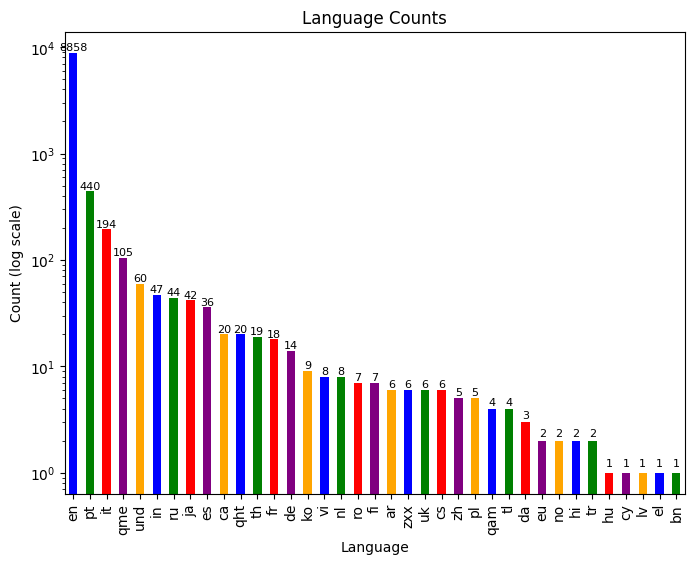

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd

# Assuming data is a pandas DataFrame
# If not, you can convert it using pd.DataFrame(your_data)
# Replace 'language' with the actual column name in your DataFrame
language_counts = data["language"].value_counts()

# Create a bar plot with log scale on y-axis
fig, ax = plt.subplots(figsize=(8, 6))

# You can customize colors as needed
colors = ['blue', 'green', 'red', 'purple', 'orange']

# Plotting the bars
language_counts.plot(kind='bar', color=colors, ax=ax)

# Adding count labels above each bar
for i, v in enumerate(language_counts):
    ax.text(i, v + 0.1, str(v), ha='center', va='bottom', fontsize=8)

# Set labels and title
ax.set_xlabel('Language')
ax.set_ylabel('Count (log scale)')
ax.set_yscale('log')  # Set log scale on y-axis
ax.set_title('Language Counts')

# Show the plot
plt.show()


In [ ]:
nltk.download('stopwords')
stemmer = nltk.SnowballStemmer("english")
stopword=set(stopwords.words('english'))

def clean(text):
    text = str(text).lower()
    text = re.sub('\[.*?\]', '', text)
    text = re.sub('https?://\S+|www\.\S+', '', text)
    text = re.sub('<.*?>+', '', text)
    text = re.sub('[%s]' % re.escape(string.punctuation), '', text)
    text = re.sub('\n', '', text)
    text = re.sub('\w*\d\w*', '', text)
    text = [word for word in text.split(' ') if word not in stopword]
    text=" ".join(text)
    text = [stemmer.stem(word) for word in text.split(' ')]
    text=" ".join(text)
    return text
data["tweet"] = data["tweet"].apply(clean)

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


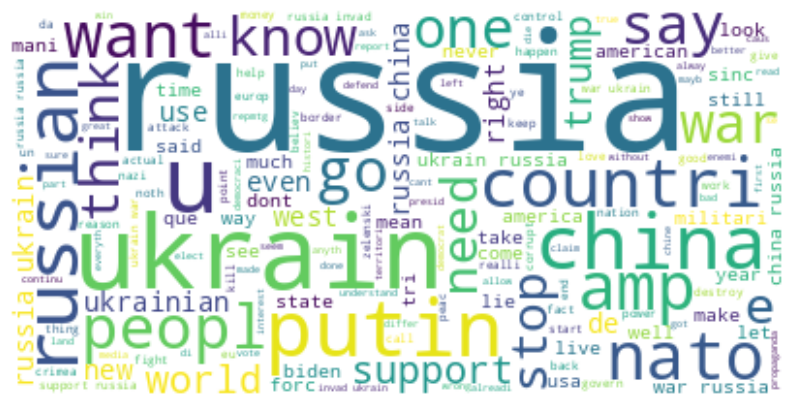

In [ ]:
text = " ".join(i for i in data.tweet)
stopwords = set(STOPWORDS)
wordcloud = WordCloud(stopwords=stopwords, background_color="white").generate(text)
plt.figure( figsize=(10,8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

In [ ]:
nltk.download('vader_lexicon')
sentiments = SentimentIntensityAnalyzer()
data["Positive"] = [sentiments.polarity_scores(i)["pos"] for i in data["tweet"]]
data["Negative"] = [sentiments.polarity_scores(i)["neg"] for i in data["tweet"]]
data["Neutral"] = [sentiments.polarity_scores(i)["neu"] for i in data["tweet"]]
data = data[["tweet", "Positive", "Negative", "Neutral"]]

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


In [ ]:
data.head()

,tweet,Positive,Negative,Neutral
0,nazijaeg derwen russia place satan rule well,0.259,0.000,0.741
1,russia haarp could destroy usa one fell swoop ...,0.000,0.280,0.720
2,putin give steven seagal order friendship,0.367,0.000,0.633
3,mainelif baddcompani it alway project russia,0.000,0.000,1.000
4,pottingpink mfarussia modrussia milhistrf muze...,0.068,0.078,0.854


### **Positive Sentiments**

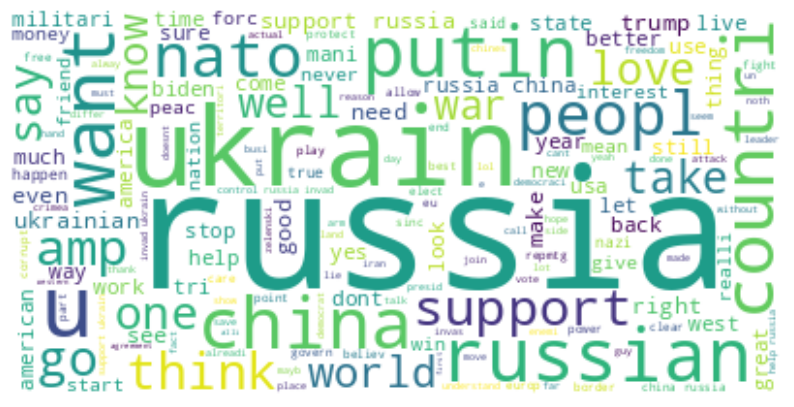

In [ ]:
positive =' '.join([i for i in data['tweet'][data['Positive'] > data["Negative"]]])
stopwords = set(STOPWORDS)
wordcloud = WordCloud(stopwords=stopwords, background_color="white").generate(positive)
plt.figure( figsize=(10,8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

### **Negative Sentiments**

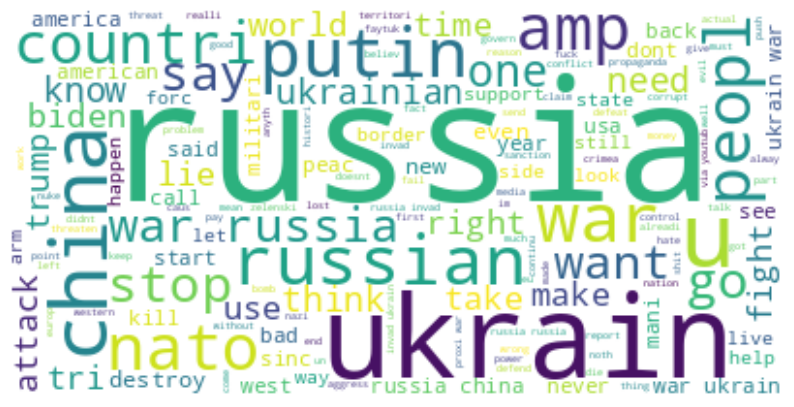

In [ ]:
negative =' '.join([i for i in data['tweet'][data['Negative'] > data["Positive"]]])
stopwords = set(STOPWORDS)
wordcloud = WordCloud(stopwords=stopwords, background_color="white").generate(negative)
plt.figure( figsize=(10,8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()